In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("sneaker_final.csv")

print("Shape:", df.shape)
df.head()


Shape: (1000, 15)


,id,product_name,brand,model,category,gender,release_date,release_year,retail_price_usd,main_color,colorway,avg_resale_price_usd,resale_premium_pct,is_collab,collab_partner
0,1,Air Jordan 1 Retro High OG Chicago,Jordan,Air Jordan 1,Basketball,Men,2015-10-31,2015,160,Red,Varsity Red/Black/Sail,240.0,50.0,0,NaN
1,2,Air Jordan 1 Retro High OG Bred,Jordan,Air Jordan 1,Basketball,Men,2016-09-03,2016,160,Black,Black/Varsity Red/White,80.0,-50.0,0,NaN
2,3,Air Jordan 1 Retro High OG Royal,Jordan,Air Jordan 1,Basketball,Men,2017-04-01,2017,160,Blue,Game Royal/Black/White,168.0,5.0,0,NaN
3,4,Air Jordan 1 Retro High OG Shadow,Jordan,Air Jordan 1,Basketball,Men,2018-04-14,2018,160,Grey,Medium Grey/Black/White,240.0,50.0,0,NaN
4,5,Air Jordan 1 Retro High OG Court Purple,Jordan,Air Jordan 1,Basketball,Men,2018-09-22,2018,160,Purple,Court Purple/Sail/Black,320.0,100.0,0,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   product_name          1000 non-null   object 
 2   brand                 1000 non-null   object 
 3   model                 1000 non-null   object 
 4   category              1000 non-null   object 
 5   gender                1000 non-null   object 
 6   release_date          1000 non-null   object 
 7   release_year          1000 non-null   int64  
 8   retail_price_usd      1000 non-null   int64  
 9   main_color            1000 non-null   object 
 10  colorway              1000 non-null   object 
 11  avg_resale_price_usd  1000 non-null   float64
 12  resale_premium_pct    1000 non-null   float64
 13  is_collab             1000 non-null   int64  
 14  collab_partner        200 non-null    object 
dtypes: float64(2), int64(4

In [3]:
df.describe()

,id,release_year,retail_price_usd,avg_resale_price_usd,resale_premium_pct,is_collab
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.0000
mean,500.500000,2020.57200,154.037000,276.404500,81.705490,0.2000
std,288.819436,2.13808,50.065119,279.140757,282.732405,0.4002
min,1.000000,2003.00000,45.000000,32.500000,-50.000000,0.0000
25%,250.750000,2020.00000,120.000000,112.000000,-25.000000,0.0000
50%,500.500000,2021.00000,150.000000,200.000000,50.000000,0.0000
75%,750.250000,2022.00000,190.000000,337.500000,100.000000,0.0000
max,1000.000000,2024.00000,300.000000,5200.000000,7900.000000,1.0000


In [4]:
df.isna().sum().sort_values(ascending=False)

collab_partner          800
id                        0
product_name              0
brand                     0
model                     0
category                  0
gender                    0
release_date              0
release_year              0
retail_price_usd          0
main_color                0
colorway                  0
avg_resale_price_usd      0
resale_premium_pct        0
is_collab                 0
dtype: int64

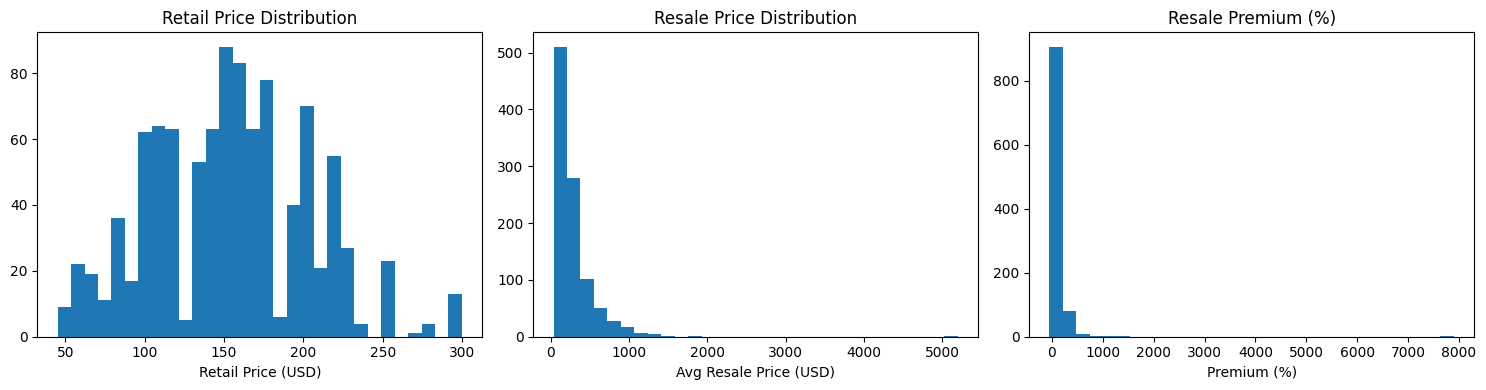

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df["retail_price_usd"], bins=30)
axes[0].set_title("Retail Price Distribution")
axes[0].set_xlabel("Retail Price (USD)")

axes[1].hist(df["avg_resale_price_usd"], bins=30)
axes[1].set_title("Resale Price Distribution")
axes[1].set_xlabel("Avg Resale Price (USD)")

axes[2].hist(df["resale_premium_pct"], bins=30)
axes[2].set_title("Resale Premium (%)")
axes[2].set_xlabel("Premium (%)")

plt.tight_layout()
plt.show()

In [6]:
df["release_date"] = pd.to_datetime(df["release_date"])

df["release_date"].isna().sum()

0

In [7]:
current_year = 2025
df["shoe_age_years"] = current_year - df["release_year"]


df[["release_year", "shoe_age_years"]].head()

,release_year,shoe_age_years
0,2015,10
1,2016,9
2,2017,8
3,2018,7
4,2018,7


In [8]:
df["collab_partner"] = df["collab_partner"].fillna("None")

df[["is_collab", "collab_partner"]].head()

,is_collab,collab_partner
0,0,None
1,0,None
2,0,None
3,0,None
4,0,None


In [9]:
invalid_price = (df["retail_price_usd"] <= 0) | (df["avg_resale_price_usd"] <= 0)
print("Rows with invalid prices:", invalid_price.sum())

Rows with invalid prices: 0


In [10]:
before = df.shape[0]

df = df[(df["resale_premium_pct"] <= 1000) & (df["avg_resale_price_usd"] <= 2000)].copy()

after = df.shape[0]
print(f"Dropped {before - after} rows")

Dropped 3 rows


In [11]:
fee_rate = 0.12

df["profit_after_fees"] = df["avg_resale_price_usd"] * (1 - fee_rate) - df["retail_price_usd"]
df["is_profitable"] = (df["profit_after_fees"] > 0).astype(int)

df[["retail_price_usd", "avg_resale_price_usd", "profit_after_fees", "is_profitable"]].head()

,retail_price_usd,avg_resale_price_usd,profit_after_fees,is_profitable
0,160,240.0,51.20,1
1,160,80.0,-89.60,0
2,160,168.0,-12.16,0
3,160,240.0,51.20,1
4,160,320.0,121.60,1


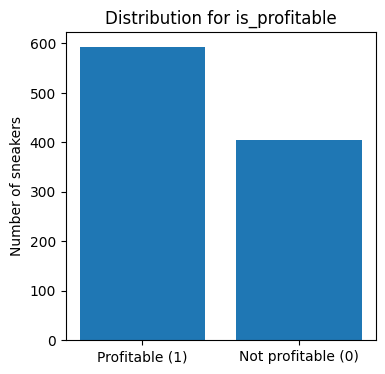

In [12]:
profit_count = df["is_profitable"].value_counts()

plt.figure(figsize=(4, 4))
plt.bar(["Profitable (1)", "Not profitable (0)"], profit_count)
plt.title("Distribution for is_profitable")
plt.ylabel("Number of sneakers")
plt.show()

In [13]:
avg_profit_by_brand = df.groupby("brand")["profit_after_fees"].mean().sort_values(ascending=False)
avg_profit_by_brand.head(10)

brand
New Balance    145.908600
Nike           105.385802
ASICS           98.446512
Jordan          91.554595
Yeezy           84.232346
Crocs           81.595833
Converse        70.858333
adidas          61.714792
Reebok          44.935000
Salomon         37.643243
Name: profit_after_fees, dtype: float64

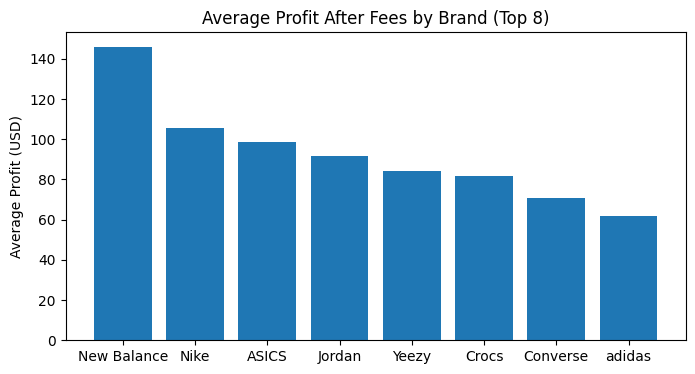

In [14]:
top_brands = avg_profit_by_brand.head(8)

plt.figure(figsize=(8, 4))
plt.bar(top_brands.index.astype(str), top_brands.values)
plt.title("Average Profit After Fees by Brand (Top 8)")
plt.ylabel("Average Profit (USD)")
plt.show()

In [15]:
leakage = ["avg_resale_price_usd", "resale_premium_pct", "profit_after_fees", "is_profitable"]

leakage

['avg_resale_price_usd',
 'resale_premium_pct',
 'profit_after_fees',
 'is_profitable']

In [16]:
numeric = ["retail_price_usd","shoe_age_years"]

categorical = ["brand","category","gender","main_color","collab_partner"]

numeric, categorical

(['retail_price_usd', 'shoe_age_years'],
 ['brand', 'category', 'gender', 'main_color', 'collab_partner'])

In [17]:
F1_numeric = ["retail_price_usd", "shoe_age_years"]
F1_categorical = []  

print("F1 numeric:", F1_numeric)
print("F1 categorical:", F1_categorical)

F1 numeric: ['retail_price_usd', 'shoe_age_years']
F1 categorical: []


In [18]:
F2_numeric = ["retail_price_usd", "shoe_age_years", "is_collab"]
F2_categorical = ["brand", "category", "gender"]

print("F2 numeric:", F2_numeric)
print("F2 categorical:", F2_categorical)

F2 numeric: ['retail_price_usd', 'shoe_age_years', 'is_collab']
F2 categorical: ['brand', 'category', 'gender']


In [19]:

df["name_length_chars"] = df["product_name"].str.len()
df["name_word_count"] = df["product_name"].str.split().str.len()

df[["product_name", "name_length_chars", "name_word_count"]].head()

,product_name,name_length_chars,name_word_count
0,Air Jordan 1 Retro High OG Chicago,34,7
1,Air Jordan 1 Retro High OG Bred,31,7
2,Air Jordan 1 Retro High OG Royal,32,7
3,Air Jordan 1 Retro High OG Shadow,33,7
4,Air Jordan 1 Retro High OG Court Purple,39,8


In [20]:
F3_numeric = ["retail_price_usd","shoe_age_years","is_collab","name_length_chars","name_word_count"]

F3_categorical = ["brand", "category", "gender"]

print("F3 numeric:", F3_numeric)
print("F3 categorical:", F3_categorical)

F3 numeric: ['retail_price_usd', 'shoe_age_years', 'is_collab', 'name_length_chars', 'name_word_count']
F3 categorical: ['brand', 'category', 'gender']


In [21]:
df["brand_grouped"] = df["brand"].apply(lambda x: "Nike" if x.lower() == "nike" else "Other")
df["brand_grouped"] = df["brand_grouped"].astype("category")

df[["brand", "brand_grouped"]].head(10)

,brand,brand_grouped
0,Jordan,Other
1,Jordan,Other
2,Jordan,Other
3,Jordan,Other
4,Jordan,Other
5,Jordan,Other
6,Jordan,Other
7,Jordan,Other
8,Jordan,Other
9,Jordan,Other


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [23]:
y = df["avg_resale_price_usd"]

indices = df.index

idx_train, idx_test = train_test_split(indices,test_size=0.2,random_state=42)


In [24]:
results_regression = [] 

def test_regression(name, y_train, y_test, y_pred_train, y_pred_test):
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = mse_train ** 0.5
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = mse_test ** 0.5
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    print(name)
    print("Train RMSE:", rmse_train)
    print("Train MAE :", mae_train)
    print("Train R^2 :", r2_train)
    print("Test RMSE :", rmse_test)
    print("Test MAE  :", mae_test)
    print("Test R^2  :", r2_test)

    results_regression.append({
        "model": name,
        "rmse_train": rmse_train,
        "mae_train": mae_train,
        "r2_train": r2_train,
        "rmse_test": rmse_test,
        "mae_test": mae_test,
        "r2_test": r2_test
    })

In [25]:
y_train_R0 = y.loc[idx_train]
y_test_R0 = y.loc[idx_test]

mean_price = y_train_R0.mean()
y_pred_train_R0 = np.full(shape=y_train_R0.shape, fill_value=mean_price)
y_pred_test_R0 = np.full(shape=y_test_R0.shape, fill_value=mean_price)

test_regression("R0 - Mean baseline", y_train_R0, y_test_R0,y_pred_train_R0, y_pred_test_R0)

R0 - Mean baseline
Train RMSE: 225.9929789451162
Train MAE : 164.39556901744152
Train R^2 : 0.0
Test RMSE : 212.57459484659395
Test MAE  : 167.04332496863236
Test R^2  : -0.011341829809011328


In [26]:
features_R1 = ["retail_price_usd"]

X_train_R1 = df.loc[idx_train, features_R1]
X_test_R1 = df.loc[idx_test, features_R1]

model_R1 = LinearRegression()
model_R1.fit(X_train_R1, y_train_R0)

y_pred_train_R1 = model_R1.predict(X_train_R1)
y_pred_test_R1 = model_R1.predict(X_test_R1)

test_regression("R1 - LinearRegression (retail only)", y_train_R0, y_test_R0, y_pred_train_R1, y_pred_test_R1)

R1 - LinearRegression (retail only)
Train RMSE: 203.99010214873164
Train MAE : 141.50237966454387
Train R^2 : 0.18524263096775428
Test RMSE : 185.19863507844562
Test MAE  : 133.78188096048515
Test R^2  : 0.23237198972484718


In [27]:
features_R2 = ["retail_price_usd", "shoe_age_years", "is_collab"]

X_train_R2 = df.loc[idx_train, features_R2]
X_test_R2 = df.loc[idx_test, features_R2]

model_R2 = LinearRegression()
model_R2.fit(X_train_R2, y_train_R0)

y_pred_train_R2 = model_R2.predict(X_train_R2)
y_pred_test_R2 = model_R2.predict(X_test_R2)

test_regression("R2 - LinearRegression (numeric features)", y_train_R0, y_test_R0, y_pred_train_R2, y_pred_test_R2)


R2 - LinearRegression (numeric features)
Train RMSE: 148.5202168512817
Train MAE : 101.90551564409134
Train R^2 : 0.5681019377394287
Test RMSE : 139.2968738359373
Test MAE  : 93.20435195516588
Test R^2  : 0.5657318384905252


In [28]:
numeric_features_R3 = ["retail_price_usd", "shoe_age_years", "is_collab"]
categorical_features_R3 = ["brand", "category", "gender"]

X_train_R3 = df.loc[idx_train, numeric_features_R3 + categorical_features_R3]
X_test_R3 = df.loc[idx_test, numeric_features_R3 + categorical_features_R3]

preprocess_R3 = ColumnTransformer(transformers=[("num", StandardScaler(), numeric_features_R3),("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features_R3)])

model_R3 = Pipeline(steps=[("preprocess", preprocess_R3),("regressor", LinearRegression())])

model_R3.fit(X_train_R3, y_train_R0)

y_pred_train_R3 = model_R3.predict(X_train_R3)
y_pred_test_R3 = model_R3.predict(X_test_R3)

test_regression("R3 - LinearRegression",y_train_R0, y_test_R0,y_pred_train_R3, y_pred_test_R3)


R3 - LinearRegression
Train RMSE: 142.69254993494323
Train MAE : 98.74698149676087
Train R^2 : 0.6013307821531197
Test RMSE : 139.45112990283727
Test MAE  : 93.37001846665676
Test R^2  : 0.5647694968679204


In [29]:
results_reg_df = pd.DataFrame(results_regression)
results_reg_df

,model,rmse_train,mae_train,r2_train,rmse_test,mae_test,r2_test
0,R0 - Mean baseline,225.992979,164.395569,0.000000,212.574595,167.043325,-0.011342
1,R1 - LinearRegression (retail only),203.990102,141.502380,0.185243,185.198635,133.781881,0.232372
2,R2 - LinearRegression (numeric features),148.520217,101.905516,0.568102,139.296874,93.204352,0.565732
3,R3 - LinearRegression,142.692550,98.746981,0.601331,139.451130,93.370018,0.564769


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score,precision_recall_fscore_support,confusion_matrix)

y_cls = df["is_profitable"]

y_train_cls = y_cls.loc[idx_train]
y_test_cls = y_cls.loc[idx_test]

print("Training class distribution:\n", y_train_cls.value_counts())
print("\nTest class distribution:\n", y_test_cls.value_counts())

Training class distribution:
 is_profitable
1    475
0    322
Name: count, dtype: int64

Test class distribution:
 is_profitable
1    118
0     82
Name: count, dtype: int64


In [31]:
results_classification = []  

def test_model(name, y_train, y_test, y_pred_train, y_pred_test):
    precision_train, recall_train, f1_train, _ = precision_recall_fscore_support(y_train, y_pred_train, average=None, labels=[0, 1])
    precision_test, recall_test, f1_test, _ = precision_recall_fscore_support(y_test, y_pred_test, average=None, labels=[0, 1])

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    print(name)
    print("Train accuracy:", acc_train)
    print("Test  accuracy:", acc_test)
    print("\nTrain precision (class 1):", precision_train[1])
    print("Train recall    (class 1):", recall_train[1])
    print("Train F1        (class 1):", f1_train[1])
    print("\nTest precision  (class 1):", precision_test[1])
    print("Test recall     (class 1):", recall_test[1])
    print("Test F1         (class 1):", f1_test[1])



    results_classification.append({
        "model": name,
        "acc_train": acc_train,
        "acc_test": acc_test,
        "precision_train_class1": precision_train[1],
        "recall_train_class1": recall_train[1],
        "f1_train_class1": f1_train[1],
        "precision_test_class1": precision_test[1],
        "recall_test_class1": recall_test[1],
        "f1_test_class1": f1_test[1]
    })

In [32]:
majority_class = y_train_cls.value_counts().idxmax()
print("Majority class in training data:", majority_class)

y_pred_train_C0 = np.full_like(y_train_cls, fill_value=majority_class)
y_pred_test_C0 = np.full_like(y_test_cls, fill_value=majority_class)

test_model("C0 - Majority baseline",
                              y_train_cls, y_test_cls,
                              y_pred_train_C0, y_pred_test_C0)

Majority class in training data: 1
C0 - Majority baseline
Train accuracy: 0.5959849435382685
Test  accuracy: 0.59

Train precision (class 1): 0.5959849435382685
Train recall    (class 1): 1.0
Train F1        (class 1): 0.7468553459119497

Test precision  (class 1): 0.59
Test recall     (class 1): 1.0
Test F1         (class 1): 0.7421383647798742


/usr/local/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [33]:
features_C1 = ["retail_price_usd", "shoe_age_years", "is_collab"]

X_train_C1 = df.loc[idx_train, features_C1]
X_test_C1 = df.loc[idx_test, features_C1]

log_reg_C1 = LogisticRegression(max_iter=1000)

log_reg_C1.fit(X_train_C1, y_train_cls)

y_pred_train_C1 = log_reg_C1.predict(X_train_C1)
y_pred_test_C1 = log_reg_C1.predict(X_test_C1)

test_model("C1 - LogisticRegression (numeric only)",y_train_cls, y_test_cls,y_pred_train_C1, y_pred_test_C1)

C1 - LogisticRegression (numeric only)
Train accuracy: 0.6549560853199499
Test  accuracy: 0.65

Train precision (class 1): 0.7136752136752137
Train recall    (class 1): 0.7031578947368421
Train F1        (class 1): 0.7083775185577943

Test precision  (class 1): 0.7307692307692307
Test recall     (class 1): 0.6440677966101694
Test F1         (class 1): 0.6846846846846847


In [34]:
numeric_features_C2 = ["retail_price_usd", "shoe_age_years", "is_collab"]
categorical_features_C2 = ["brand", "category", "gender"]

X_train_C2 = df.loc[idx_train, numeric_features_C2 + categorical_features_C2]
X_test_C2 = df.loc[idx_test, numeric_features_C2 + categorical_features_C2]

preprocess_C2 = ColumnTransformer(transformers=[("num", StandardScaler(), numeric_features_C2),("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features_C2)])

log_reg_C2 = LogisticRegression(max_iter=1000)

model_C2 = Pipeline(steps=[("preprocess", preprocess_C2),("classifier", log_reg_C2)])

model_C2.fit(X_train_C2, y_train_cls)

y_pred_train_C2 = model_C2.predict(X_train_C2)
y_pred_test_C2 = model_C2.predict(X_test_C2)

test_model("C2 - LogisticRegression (scaled + one-hot)",y_train_cls, y_test_cls,y_pred_train_C2, y_pred_test_C2)

C2 - LogisticRegression (scaled + one-hot)
Train accuracy: 0.7176913425345044
Test  accuracy: 0.66

Train precision (class 1): 0.7520161290322581
Train recall    (class 1): 0.7852631578947369
Train F1        (class 1): 0.768280123583934

Test precision  (class 1): 0.7083333333333334
Test recall     (class 1): 0.7203389830508474
Test F1         (class 1): 0.7142857142857143


In [35]:
log_reg_C3 = LogisticRegression(max_iter=1000, class_weight="balanced")

model_C3 = Pipeline(steps=[("preprocess", preprocess_C2),("classifier", log_reg_C3)])

model_C3.fit(X_train_C2, y_train_cls)

y_pred_train_C3 = model_C3.predict(X_train_C2)
y_pred_test_C3 = model_C3.predict(X_test_C2)

test_model("C3 - LogisticRegression (balanced class weights)",y_train_cls, y_test_cls,y_pred_train_C3, y_pred_test_C3)

C3 - LogisticRegression (balanced class weights)
Train accuracy: 0.6612296110414053
Test  accuracy: 0.69

Train precision (class 1): 0.8059701492537313
Train recall    (class 1): 0.5684210526315789
Train F1        (class 1): 0.6666666666666666

Test precision  (class 1): 0.85
Test recall     (class 1): 0.576271186440678
Test F1         (class 1): 0.6868686868686869


In [36]:
results_cls_df = pd.DataFrame(results_classification)
results_cls_df

,model,acc_train,acc_test,precision_train_class1,recall_train_class1,f1_train_class1,precision_test_class1,recall_test_class1,f1_test_class1
0,C0 - Majority baseline,0.595985,0.59,0.595985,1.000000,0.746855,0.590000,1.000000,0.742138
1,C1 - LogisticRegression (numeric only),0.654956,0.65,0.713675,0.703158,0.708378,0.730769,0.644068,0.684685
2,C2 - LogisticRegression (scaled + one-hot),0.717691,0.66,0.752016,0.785263,0.768280,0.708333,0.720339,0.714286
3,C3 - LogisticRegression (balanced class weights),0.661230,0.69,0.805970,0.568421,0.666667,0.850000,0.576271,0.686869


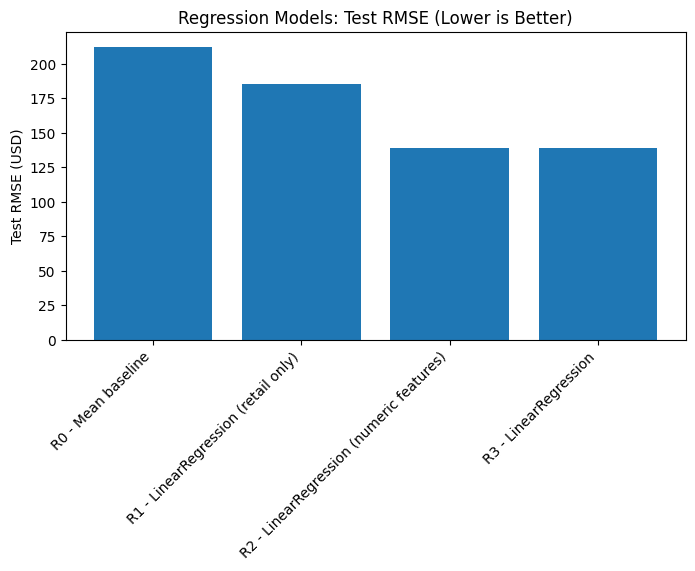

In [37]:
plt.figure(figsize=(8, 4))

models = results_reg_df["model"]
rmse_test = results_reg_df["rmse_test"]

plt.bar(models, rmse_test)
plt.title("Regression Models: Test RMSE (Lower is Better)")
plt.ylabel("Test RMSE (USD)")
plt.xticks(rotation=45, ha="right")

plt.show()

In [ ]:
plt.figure(figsize=(8, 4))

models_cls = results_cls_df["model"]
f1_test_class1 = results_cls_df["f1_test_class1"]

plt.bar(models_cls, f1_test_class1)
plt.title("Classification Models: Test F1 for Profitable Class (Label 1)")
plt.ylabel("Test F1 (Profitable)")
plt.xticks(rotation=45, ha="right")

plt.show()

In [39]:
df["release_bucket"] = pd.cut(df["release_year"],bins=[2000, 2015, 2019, 2025],labels=["<=2015", "2016-2019", "2020+"])

brand_year_profit = (df.groupby(["brand", "release_bucket"]).agg(avg_profit_after_fees=("profit_after_fees", "mean"),pct_profitable=("is_profitable", "mean"),count=("is_profitable", "size")).reset_index())

brand_year_profit["pct_profitable"] = 100 * brand_year_profit["pct_profitable"]

min_count = 10
summary_table = brand_year_profit[brand_year_profit["count"] >= min_count]

summary_table.head(20)

/tmp/ipykernel_55172/3753835541.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brand_year_profit = (df.groupby(["brand", "release_bucket"]).agg(avg_profit_after_fees=("profit_after_fees", "mean"),pct_profitable=("is_profitable", "mean"),count=("is_profitable", "size")).reset_index())


,brand,release_bucket,avg_profit_after_fees,pct_profitable,count
2,ASICS,2020+,94.780000,57.500000,40
5,Brooks,2020+,-24.506667,13.333333,15
7,Converse,2016-2019,106.591667,66.666667,12
11,Crocs,2020+,88.030000,80.000000,20
14,Hoka One One,2020+,-9.885185,33.333333,27
16,Jordan,2016-2019,149.163333,69.444444,36
17,Jordan,2020+,80.820563,61.971831,142
23,New Balance,2020+,147.711648,68.131868,91
25,Nike,2016-2019,198.958667,73.333333,60
26,Nike,2020+,77.638571,58.673469,196
